## Data Preparation Tasks
After we have seen how our data looks, next we need to spend some time preparing our data for use.  This means we need to ensure that the data types are correct, that we have dealt with "dirty" data (missing fields, outliers, unary values), and possibly creating new factors which can enhance predictive models or better explain the data we have. 


* [X] Dealing with missing data]
  - [X] Replacing with userdefined value
  - [X] Mean/median/mode
  - [X] Random value

* [X] Fixing inappropriate values
  * [X] Outliers
  * [X] Unary values
  * [X] Feature selection
* [ ] Feature engineering
  - [ ] Discretizing (binning)
  - [ ] Converting categorical values to numeric
  - [ ] Standardizing values (z-score standardization)
  - [ ] Normalizing values (min/max normalization)


In [183]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from pathlib import Path
import sys
sys.path.append('..')
from src.data import load_data
#plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 10)


Before we jump in, we'll use the [cereal](DataDictionary.ipynb#cereal) dataset for some of this example.

In [184]:
dirty_cereal_df = load_data('cereals_dirty')

In [185]:
# This will give us some information, but a more exhaustive rendention maybe in order
dirty_cereal_df.info()

# TODO: Explore the dirty cereal data, dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      76 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     72 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
 16  foodtype  77 non-null     object 
dtypes: float64(7), int64(6), object(4)
memory usage: 10.4+ KB


### Missing data

Missing data can be fields that are represented as NULL, Na, NaN (not a number), blanks or it could even just plain wrong (like a number where you expect a string or a string where you expect a number).  All of these situations can be handled similarly.  Fortunately, the `pandas` library gives us some tools to deal with them.

In [156]:
dirty_cereal_df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,foodtype
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,NaN,0.33,68.402973,breakfast
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,breakfast
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,breakfast
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,breakfast
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,breakfast
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,breakfast
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.0,1.00,33.174094,breakfast
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,NaN,0.75,37.038562,breakfast
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.0,0.67,49.120253,breakfast
9,Bran_Flakes,Post,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.0,0.67,53.313813,breakfast


Right away we can see in the first line that there is a missing value.  Let's see if we find any more

In [157]:
# This statement counts up the number of null/na values in every column
dirty_cereal_df.isnull().sum()

name        0
mfr         0
type        1
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       5
sugars      1
potass      2
vitamins    0
shelf       0
weight      3
cups        0
rating      0
foodtype    0
dtype: int64

<AxesSubplot:>

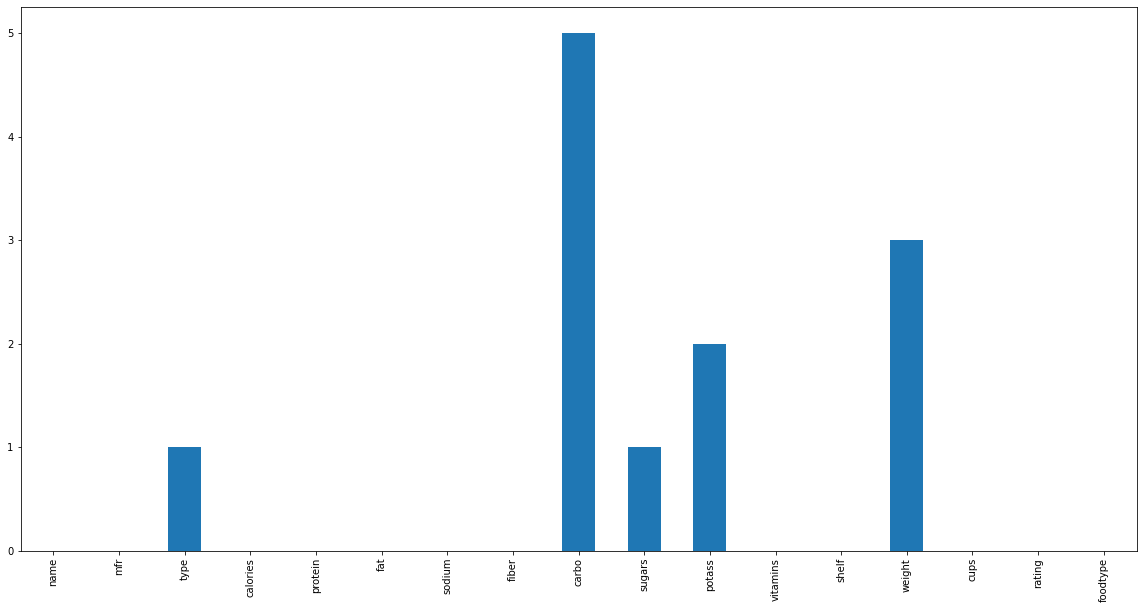

In [158]:
# And since we know a bit about visualization, 
dirty_cereal_df.isnull().sum().plot(kind='bar')

<AxesSubplot:>

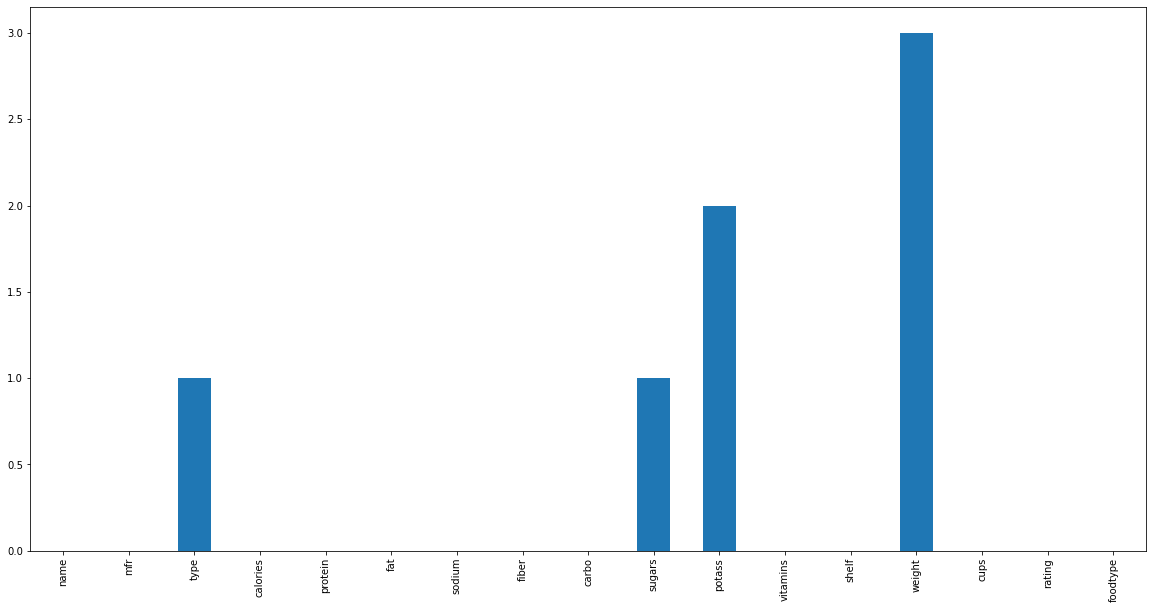

In [159]:
# So it seems we have some null or NaN fields, how should we proceed
# We could replace the values
# new_cereal_df = dirty_cereal_df.copy(deep=True)
# Find all the fields with an na or null and replace with 0
# Notice .loc allows us to access a set of rows/columns by label or boolean
dirty_cereal_df.loc[dirty_cereal_df.carbo.isna(), 'carbo'] = 0
# We could also replace with the mean/median
dirty_cereal_df.loc[dirty_cereal_df.carbo.isna(), 'carbo'] = dirty_cereal_df['carbo'].mean()
dirty_cereal_df.isnull().sum().plot(kind='bar')

## Fixing inappropriate values
Let's check out our data and see if we can find any outliers or maybe inappropriate values.  We'll start by checking the datatype of each column

In [160]:
dirty_cereal_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
foodtype     object
dtype: object

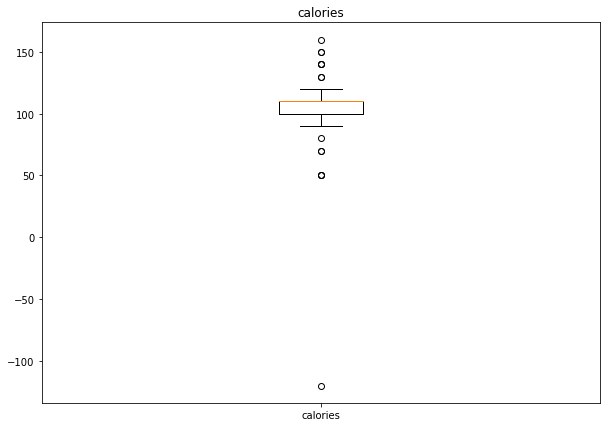

In [161]:
# Let's get a box plot for a numerical column

fig = plt.figure(figsize=(10,7))
plt.boxplot(dirty_cereal_df['calories'], labels=['calories'])
#plt.boxplot(dirty_cereal_df[['calories','sugars']], labels='calories'])
plt.title('calories')
plt.show()

Seaborn allows us to do a similar chart

Text(0.5, 1.0, 'sugars by manufacturer')

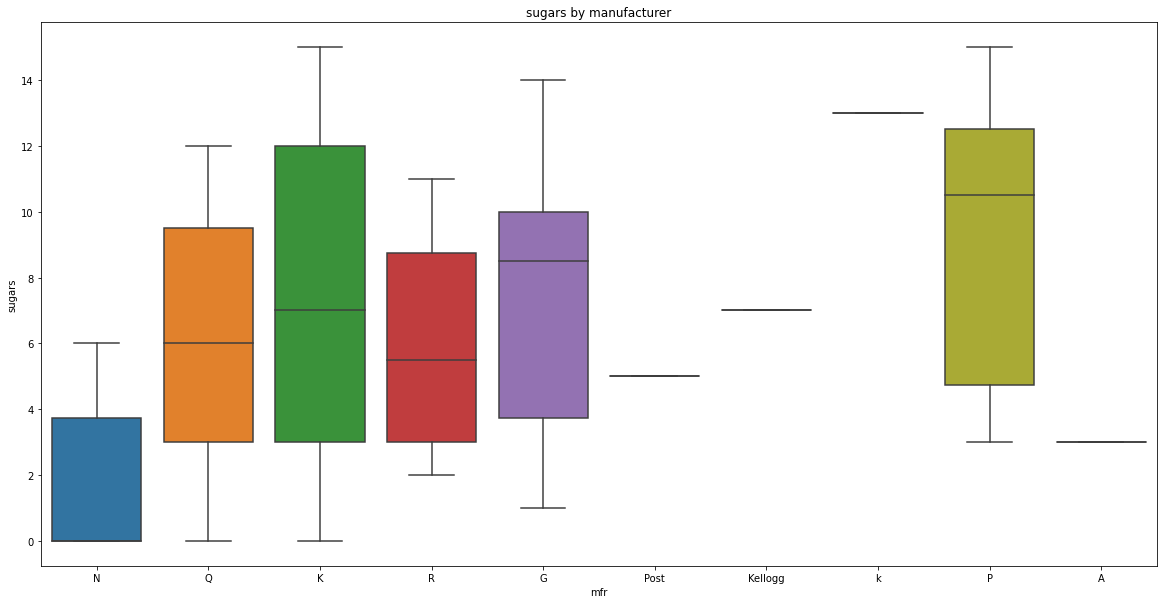

In [162]:
# Also we can do this with seaborn
# Notice the [[]] indexing method, this says return the result as a dataframe rather than a series
g = sns.boxplot(data=dirty_cereal_df[['sugars','mfr']],x='mfr',y='sugars');
g.set_title('sugars by manufacturer')

From the first box plot, we can see that that have an issue with calories (there is a negative value).  You might want to check the other columns or maybe just do a visual scan of the columns to see what else might be a problem.

Also we can see that we have Post and Kellogg as manufacturers.  I'm guessing this is a mistake since all the others only have a single letter representing the brand.  We may want to address this as well

The next step is to figure out what to do with this data.  Usually we don't want to eliminate it from the source data and it might be helpful in our actual dataset - so we can simply filter out the bad rows or we can replace them.

In [163]:
# TODO: Replace the calories that are negative with the positive value
dirty_cereal_df['calories'] = dirty_cereal_df['calories'].abs()

In [164]:
# Let's check to see if any of the other numeric fields are suspect
dirty_cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,75.000000,77.000000,77.000000,74.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,13.909091,7.026316,98.666667,28.246753,2.207792,1.026351,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,5.305612,4.378656,70.410636,22.342523,0.832524,0.149342,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [165]:
# let's take a look at the non-numeric columns
dirty_cereal_df.select_dtypes(exclude='number').columns

Index(['name', 'mfr', 'type', 'foodtype'], dtype='object')

In [166]:
[dirty_cereal_df[c].value_counts() for c in dirty_cereal_df.select_dtypes(exclude='number').columns]

[100%_Bran                    1
 Nutri-Grain_Almond-Raisin    1
 Quaker_Oat_Squares           1
 Puffed_Wheat                 1
 Puffed_Rice                  1
                             ..
 Frosted_Flakes               1
 Froot_Loops                  1
 Double_Chex                  1
 Crispy_Wheat_&_Raisins       1
 Wheaties_Honey_Gold          1
 Name: name, Length: 77, dtype: int64,
 G          22
 K          21
 Q           8
 R           8
 P           8
 N           6
 Post        1
 Kellogg     1
 k           1
 A           1
 Name: mfr, dtype: int64,
 C    73
 H     3
 Name: type, dtype: int64,
 breakfast    77
 Name: foodtype, dtype: int64]

<AxesSubplot:xlabel='type', ylabel='count'>

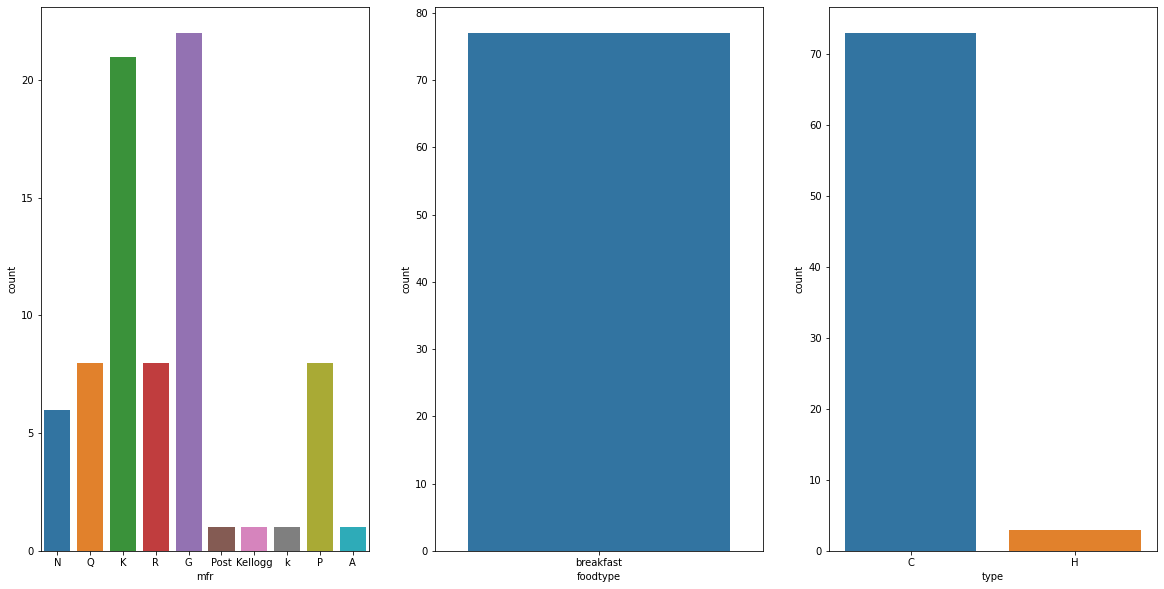

In [167]:
# And maybe most interesting is to look at these in a bar chart
fig, axs = plt.subplots(ncols=3)

sns.countplot(x='mfr', data=dirty_cereal_df, ax=axs[0])
sns.countplot(x='foodtype', data=dirty_cereal_df, ax=axs[1])
sns.countplot(x='type', data=dirty_cereal_df, ax=axs[2])


In [168]:
# Since we realize that `foodtype` is just the same value we can drop the column from our dataset
dirty_cereal_df = dirty_cereal_df.drop(columns=['foodtype'])
dirty_cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,NaN,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


#### Fixing inappropriate values - Your turn
---------
There are several other issues in this dataset like 
- Sugars and potass also have 0/null values
- there is a calorie number < 0
- the manufacturer codes include K, G, P etc, but also Post and Kellogg how to deal?
- some rows have weight = 0 or na, should we drop them? or replace them with mean values?

In [169]:
# TODO: What about sugars and potass these have 0/null values
# TODO: Decide what to do about calorie number <= 0
# TODO: Deal with Post, Kellogg
dirty_cereal_df.loc[dirty_cereal_df['mfr']=='Post','mfr']='P'
dirty_cereal_df.loc[dirty_cereal_df['mfr']=='Kellogg','mfr']='K'
dirty_cereal_df['mfr']=dirty_cereal_df.mfr.str.upper()
# TODO: Deal with missing weight

## Data Preparation
Occassionally we find it helpful to adjust our data to make it easier to work with or make it more suitable for different machine learning models.  While we will look at a few more methods as we deal with specific algorithms, here are some of the most common steps we may want to take as we continue our EDA

- [ ] Dealing with interval values 
    - [x] Standardizing values (z-score standardization)
    - [x] Normalizing values (min/max normalization)
    - [X] Discretizing (binning)
- [ ] Dealing with categorical values
    - [ ] Identifying ordinal values
    - [ ] Encoding Nominal/Ordinals

- [ ] Dummy variables



### Normalization && Standardization
Often when we are dealing with data, the units are not on the same scale.  For instance in this case, `calories` is a range from 50 to 160 whereas `weight` ranges from 0.5 to 1.5.  Most of our mathematical algorithms used in machine learning would give `calories` an inappropriately large influence on the outcome.  So we need to adjust for both of these to be on a similar scale.  This is where standardization and normalization comes in.  We can use a min/max normalization which will make each category on a scale from 0-1

We do this with the following formula
$$x_{scaled} = \frac{x-min(x)}{max(x)-min(x)}$$

_The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between a desired range (like [-1,1] or [0,1]) while standardization transforms data to have a mean of zero and a standard deviation of 1. Advantage of Normalization over Standardization is that we are not bound to any specific distribution. In addition to that Normalization also suppresses the effect of outliers to some extent._

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks

In [170]:
dirty_cereal_df[['calories','weight']].describe()

,calories,weight
count,77.000000,74.000000
mean,106.883117,1.026351
std,19.484119,0.149342
min,50.000000,0.500000
25%,100.000000,1.000000
50%,110.000000,1.000000
75%,110.000000,1.000000
max,160.000000,1.500000


<AxesSubplot:title={'center':'Scaled'}, xlabel='calories_NORM', ylabel='weight_NORM'>

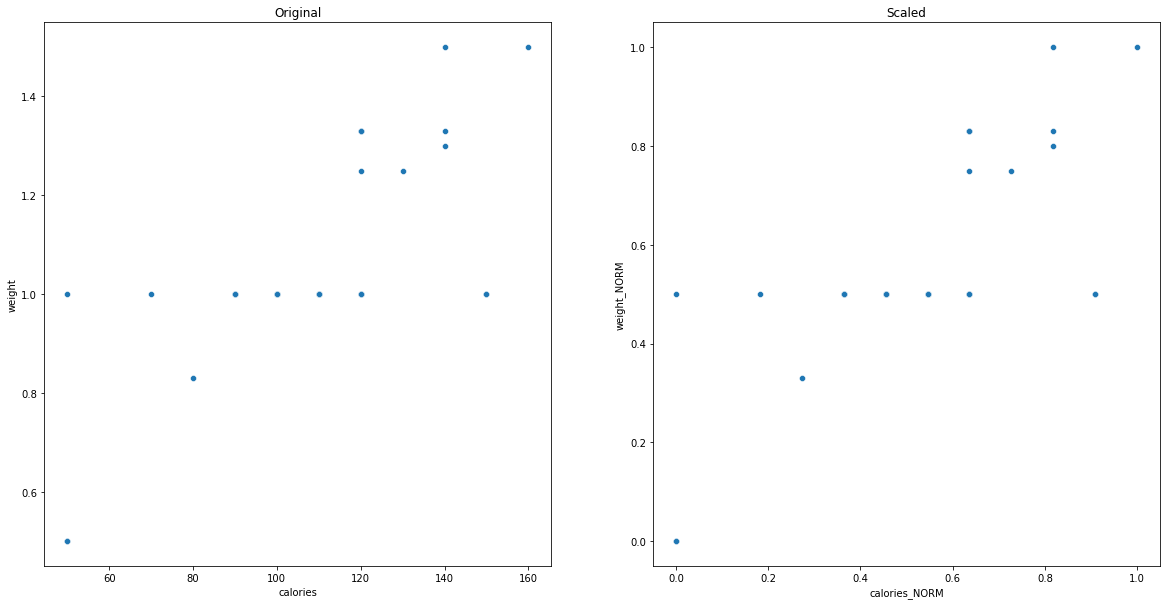

In [171]:
def normalize(data, column):
    new_column_name = f'{column}_NORM'
    data[new_column_name]=(data[column]-data[column].min())/(data[column].max()-data[column].min())
    return data

# Apply a normalization to our dataset
normalize(dirty_cereal_df,'calories')
normalize(dirty_cereal_df,'weight')
fig, axs = plt.subplots(ncols=2)

axs[0].set_title('Original')
axs[1].set_title('Scaled')
sns.scatterplot(data=dirty_cereal_df, x='calories', y='weight', ax=axs[0])
sns.scatterplot(data=dirty_cereal_df, x='calories_NORM', y='weight_NORM', ax=axs[1])

In statistics, standardization is the process of putting different variables on the same scale. This process allows you to compare scores between different types of variables. Typically, to standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviation.

This process produces standard scores that represent the number of standard deviations above or below the mean that a specific observation falls. For instance, a standardized value of 2 indicates that the observation falls 2 standard deviations above the mean. This interpretation is true regardless of the type of variable that you standardize.
We use the following formula to Standardize a Variable value

$$z=\frac{(X-\mu)}{\sigma}$$

Standardization works best when the variable follows a Normal distribution due to the fact that in a Normal Distribution 68% of data lies within 1 standard deviation from the mean, 95% within 2 standard deviation and 99.7% within 3 standard devations from the mean. So it is highly unlikely that a variable value is greater than +-3

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<AxesSubplot:title={'center':'Normalized'}, xlabel='calories_STD', ylabel='Count'>

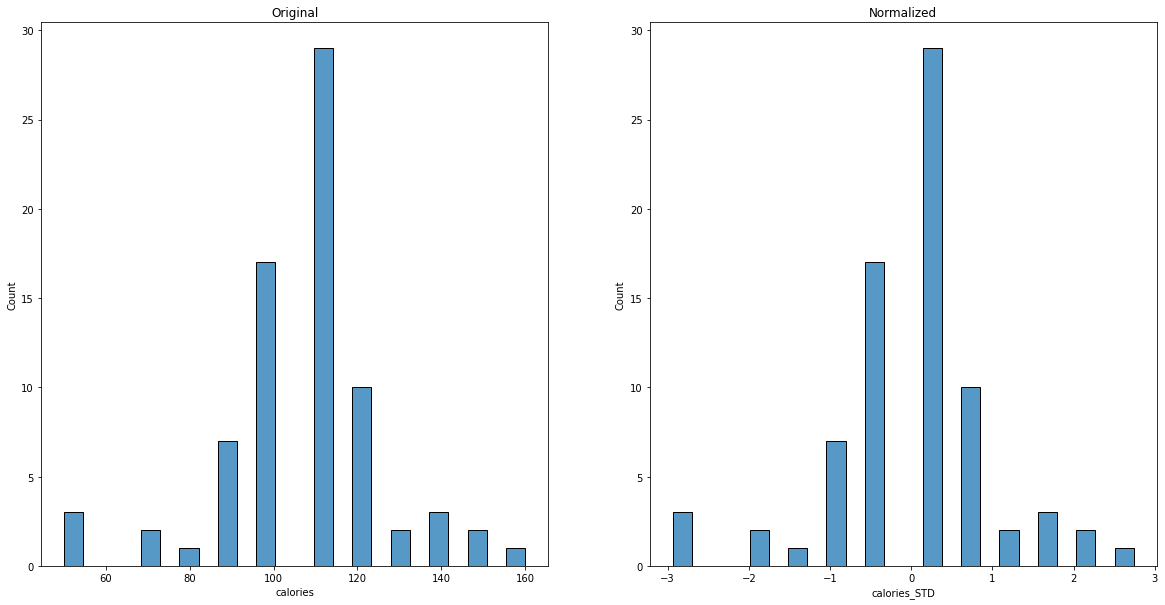

In [172]:
from scipy import stats
def standardize(data, column):
    new_column_name = f'{column}_STD'
    data[new_column_name] = stats.zscore(data[column])
    # data[new_column_name]=(data[column]-data[column].mean())/data[column].std()
    return data

# Apply a standardization to our dataset
standardize(dirty_cereal_df,'calories')
fig, axs = plt.subplots(ncols=2)

axs[0].set_title('Original')
axs[1].set_title('Normalized')
sns.histplot(data=dirty_cereal_df, x='calories', ax=axs[0])
sns.histplot(data=dirty_cereal_df, x='calories_STD', ax=axs[1])

### Discretizing / Binning
Sometimes, it might be helpful to have categories for the ranges of values rather than just the value themselves.  For instance, if we are looking at the cereal example, it might be helpful to determine that cereal with a low calorie count vs a high calorie count

low cal     30
normal      29
high cal    18
Name: calorie_groups, dtype: int64


<AxesSubplot:xlabel='calorie_groups', ylabel='count'>

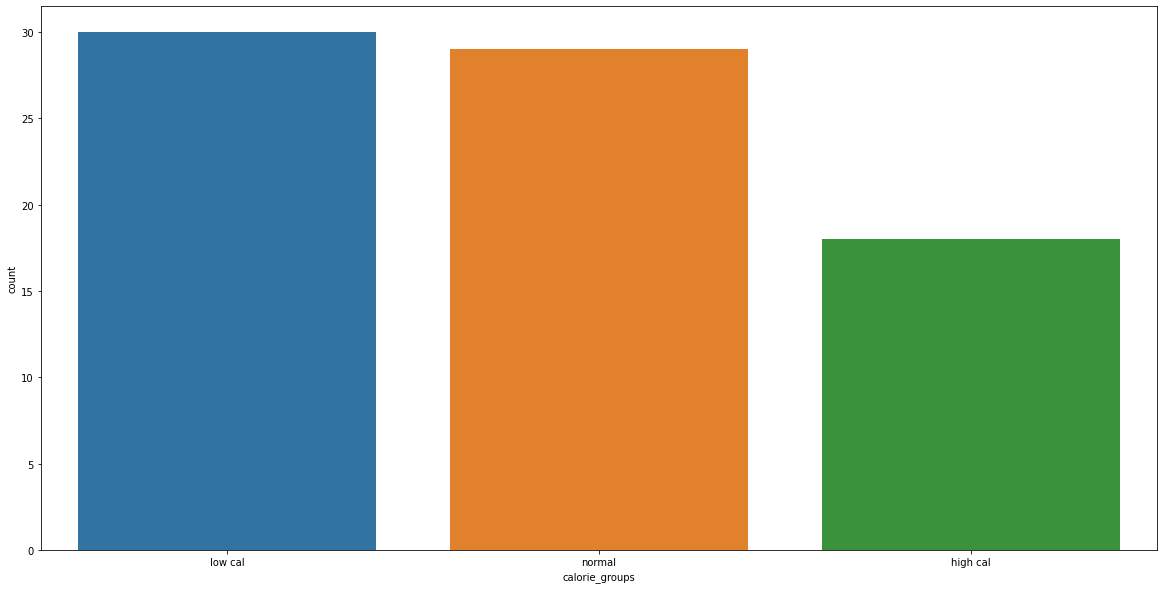

In [173]:
# How about we create a category for these fields instead
dirty_cereal_df['calorie_groups'] = pd.qcut(dirty_cereal_df.calories,q=3,duplicates='drop',labels=['low cal','normal','high cal'])
print(dirty_cereal_df.calorie_groups.value_counts())
sns.countplot(x='calorie_groups', data=dirty_cereal_df)

## Dealing with categorical variables
Machine learning models deal in numeric data and don't handle string data or categorical data very well, so often times we are left to deal with categorical data and turning it into numerical.

In the cereal dataset we have `mfr`, `type`, and `calorie_groups` which are not numeric, but we also have `shelf` which is numeric, but really is a categorical field.  So we need to be careful about this as well.

We have a couple of options depending on which kind of data we are encoding.  If we are dealing with data and the order matters, for instance using a Likert scale (`disagree`,`somewhat agree`, `agree` etc), then we have ordinal dta and the data should be encoded with values 0 to n-1 (where n is the number of categories).  Otherwise, we should put our features in a OneHotEncoding whereby their is a feature created for each category and a 1 is placed in the proper column that matches the feature.

In [174]:
dirty_cereal_df.dtypes

name                object
mfr                 object
type                object
calories             int64
protein              int64
fat                  int64
sodium               int64
fiber              float64
carbo              float64
sugars             float64
potass             float64
vitamins             int64
shelf                int64
weight             float64
cups               float64
rating             float64
calories_NORM      float64
weight_NORM        float64
calories_STD       float64
calorie_groups    category
dtype: object

In [175]:
# Start with ensuring pandas knows what we are dealing with
print(dirty_cereal_df.mfr.value_counts())
dirty_cereal_df['mfr'] = pd.Categorical(dirty_cereal_df['mfr'])
dirty_cereal_df.mfr.describe()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64


count     77
unique     7
top        K
freq      23
Name: mfr, dtype: object

In [181]:

# We could use this to just get the dummy columns and join ourselves
#   dirty_cereal_df = pd.concat([dirty_cereal_df, pd.get_dummies(dirty_cereal_df['mfr'],prefix="mfr",prefix_sep="_")], axis=1)
#   dirty_cereal_df.drop(columns='mfr')

# Or we can let pandas handle this all for us
dirty_cereal_df = pd.get_dummies(dirty_cereal_df,prefix=['mfr','type'],columns=['mfr','type'])

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,calorie_groups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,...,low cal,0,0,0,1,0,0,0,1,0
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,...,high cal,0,0,0,0,0,1,0,1,0
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,...,low cal,0,0,1,0,0,0,0,1,0
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,...,low cal,0,0,1,0,0,0,0,1,0
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,...,normal,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,...,normal,0,1,0,0,0,0,0,1,0
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,...,normal,0,1,0,0,0,0,0,1,0
74,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,...,low cal,0,0,0,0,0,0,1,1,0
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,...,low cal,0,1,0,0,0,0,0,1,0


# Next Steps
Now that we have an idea of how to deal with outliers, manage null values, filter rows and columns of our data and fix other issues our data may be ready to start the modelling process.  In the next notebook [Classification](./30-Classification.ipynb), we'll start to see how to apply the techniques of prediction.
<div align='center'/>

[Back to TOC](./00-Introduction.ipynb)&emsp;&emsp;[<- Back: 02-Exploratory Data Analysis](./10-ExploratoryDataAnalysis.ipynb)&emsp;&emsp;[Next: Classification ->](./30-Classification.ipynb)